/var/folders/v9/0cr7_35s4q7f7g0306ks9xvm0000gn/T/ipykernel_13847/3476373067.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


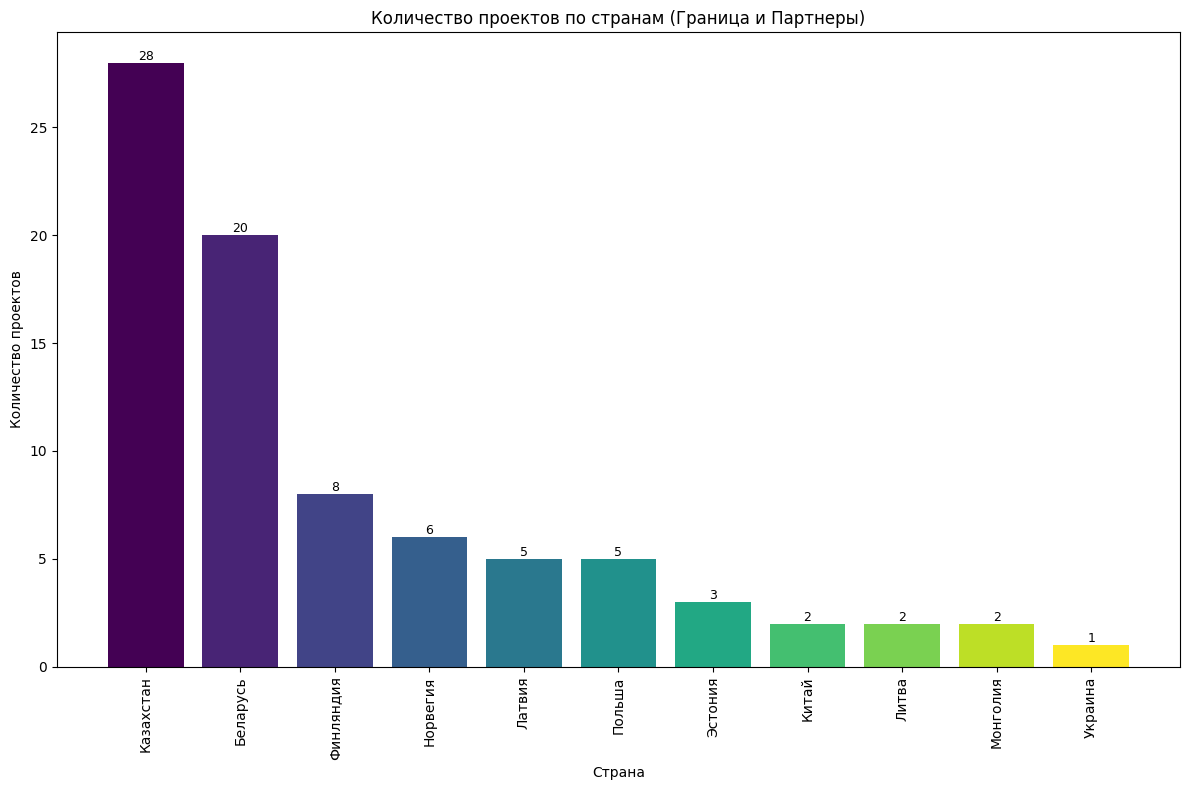

<Figure size 800x800 with 0 Axes>

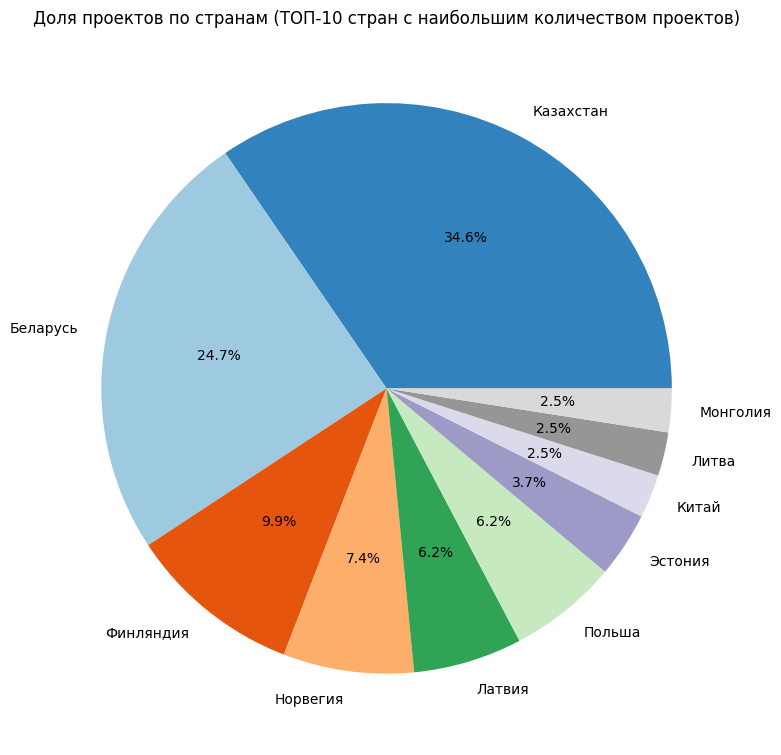

In [4]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# 1. Подключение к базе данных
db_config = {
    'host': 'localhost',
    'database': 'projectsdb',
    'user': 'root',
    'password': 'NewStrongPassword'
}

# 2. Чтение SQL-запроса из файла
query_file = "../sql_queries/5_border_and_partner_countries_ranking.sql"

# 3. Функция для выполнения SQL-запроса и загрузки данных в DataFrame
def execute_query(query_file):
    with open(query_file, 'r', encoding='utf-8') as file:
        query = file.read()

    # Подключаемся к базе данных
    conn = mysql.connector.connect(**db_config)
    
    # Выполняем запрос и загружаем результат в DataFrame
    df = pd.read_sql(query, conn)
    
    # Закрываем соединение
    conn.close()
    
    return df

# 4. Выполнение запроса
df = execute_query(query_file)

# 5. Просмотр загруженных данных
df.head()

# 6. Визуализация: Столбчатая диаграмма для количества проектов по странам с градиентом
plt.figure(figsize=(12, 8))
df_sorted = df.sort_values('Количество_проектов', ascending=False)

# Цвета для градиента
colors = cm.viridis(np.linspace(0, 1, len(df_sorted)))

bars = plt.bar(df_sorted['Страна'], df_sorted['Количество_проектов'], color=colors)

plt.title('Количество проектов по странам (Граница и Партнеры)')
plt.xlabel('Страна')
plt.ylabel('Количество проектов')
plt.xticks(rotation=90)

# Добавим значения на вершинах столбиков
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 7. Визуализация: Круговая диаграмма для доли проектов по странам (ТОП-10 стран)
plt.figure(figsize=(8, 8))
top_countries = df_sorted.head(10)

# Используем палитру для более ярких цветов
colors = plt.cm.tab20c(np.linspace(0, 1, len(top_countries)))

# Параметры для круговой диаграммы с более яркими цветами
top_countries.plot.pie(y='Количество_проектов', labels=top_countries['Страна'], autopct='%1.1f%%', figsize=(8, 8), colors=colors, legend=False)

plt.title('Доля проектов по странам (ТОП-10 стран с наибольшим количеством проектов)')
plt.ylabel('')  # Убираем подпись оси Y
plt.tight_layout()
plt.show()
